http://pandas.pydata.org/pandas-docs/stable/10min.html

# 10 Minutes to pandas

This is a short introduction to pandas, geared mainly for new users. You can see more complex recipes in the [Cookbook](http://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook) 


#### This version is the same as the public availble version for getting started with pandas, but with edits, comments, and some small addions for the Data-X course at Berkeley.  Edited, Ikhlaq Sidhu, Jan 2017

Customarily, we import as follows:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# this line makes plots/graphs appear within the notebook
%matplotlib inline

## Object Creation

See the [Data Structure Intro section](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dsintro) 

Creating a Series by passing a list of values, letting pandas create a default integer index:

In [3]:
# This is a series, its like an array but with an index
s = pd.Series([1,3,5,np.nan,6,8])

In [4]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a DataFrame by passing a numpy array, with a datetime index and labeled columns:

In [5]:
# We will look at the time series index separately, but its also in this notebook.
dates = pd.date_range('20130101', periods=6)

In [6]:
# dates is a time series object used as an index
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [7]:
# The DataFrame below is from an np.array and column list
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

In [8]:
df

,A,B,C,D
2013-01-01,2.057798,-2.702485,-0.453129,-0.623291
2013-01-02,0.518069,-1.072285,0.642737,-0.436096
2013-01-03,0.543855,-0.792005,0.451127,-1.479581
2013-01-04,0.673962,-1.758599,0.987110,2.658986
2013-01-05,-1.742085,0.373977,0.241728,0.845163
2013-01-06,1.676085,-0.603359,-1.448392,-0.426467


Creating a DataFrame by passing a dict of objects that can be converted to series-like.

In [9]:
# See below that all the columns can be different types, created from a dictionary.
df2 = pd.DataFrame({'A':1.,
                   'B':pd.Timestamp('20130102'),
                   'C':pd.Series(1,index=list(range(4)),dtype='float32'),
                   'D':np.array([3]*4,dtype='int32'),
                   'E':pd.Categorical(["test","train","test","train"]),
                   'F':'foo'})

In [10]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


Having specific [dtypes](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-dtypes)

In [11]:
# type for each column
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

If you’re using IPython, tab completion for column names (as well as public attributes) is automatically enabled. Here’s a subset of the attributes that will be completed:

In [12]:
# df2.<TAB>

As you can see, the columns A, B, C, and D are automatically tab completed. E is there as well; the rest of the attributes have been truncated for brevity.

## Viewing Data

See the [Basics section](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics) 

See the top & bottom rows of the frame

In [13]:
# as before, head(n) gives you the first n rows, defaults to 5
df.head()

,A,B,C,D
2013-01-01,2.057798,-2.702485,-0.453129,-0.623291
2013-01-02,0.518069,-1.072285,0.642737,-0.436096
2013-01-03,0.543855,-0.792005,0.451127,-1.479581
2013-01-04,0.673962,-1.758599,0.987110,2.658986
2013-01-05,-1.742085,0.373977,0.241728,0.845163


In [14]:
df.tail(3)

,A,B,C,D
2013-01-04,0.673962,-1.758599,0.987110,2.658986
2013-01-05,-1.742085,0.373977,0.241728,0.845163
2013-01-06,1.676085,-0.603359,-1.448392,-0.426467


Display the index, columns, and the underlying numpy data

In [15]:
# if you want the index by itelf, use .index
df.index
# df.index[2:4]

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [16]:
# Here is a list of the columns
df.columns
#df.columns[2]
#df.columns[2:4]

Index([u'A', u'B', u'C', u'D'], dtype='object')

In [17]:
# df.values extracts only the data in np.array
df.values

array([[ 2.05779781, -2.70248478, -0.4531291 , -0.62329051],
       [ 0.51806888, -1.07228492,  0.64273726, -0.43609627],
       [ 0.54385534, -0.79200474,  0.4511274 , -1.47958124],
       [ 0.67396213, -1.75859866,  0.98710993,  2.65898646],
       [-1.74208537,  0.37397746,  0.24172763,  0.84516299],
       [ 1.67608492, -0.60335882, -1.4483918 , -0.42646684]])

Describe shows a quick statistic summary of your data

In [141]:
# A quick way to get statistics
df.describe()
# df.describe()['A'][1]
# df.describe()[2:3]

,A,B,C,D
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-7.205763,-2.305402,26.947456,-13.105955
std,8.861247,8.342224,15.323814,9.549339
min,-26.919438,-22.244967,-7.145259,-40.008779
25%,-15.373679,-7.860837,18.203451,-18.517536
50%,-5.581175,-2.098278,25.253406,-12.778470
75%,-0.315856,3.915600,39.413715,-6.826088
max,10.014424,16.702602,60.283360,7.749159


Transposing your data

In [19]:
# yes, this is the pandas method
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,2.057798,0.518069,0.543855,0.673962,-1.742085,1.676085
B,-2.702485,-1.072285,-0.792005,-1.758599,0.373977,-0.603359
C,-0.453129,0.642737,0.451127,0.987110,0.241728,-1.448392
D,-0.623291,-0.436096,-1.479581,2.658986,0.845163,-0.426467


Sorting by an axis

In [20]:
# recall df
df

,A,B,C,D
2013-01-01,2.057798,-2.702485,-0.453129,-0.623291
2013-01-02,0.518069,-1.072285,0.642737,-0.436096
2013-01-03,0.543855,-0.792005,0.451127,-1.479581
2013-01-04,0.673962,-1.758599,0.987110,2.658986
2013-01-05,-1.742085,0.373977,0.241728,0.845163
2013-01-06,1.676085,-0.603359,-1.448392,-0.426467


In [21]:
# See that its using the header to sort
df.sort_index(axis=1, ascending=False)
# try df[2:3].sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.623291,-0.453129,-2.702485,2.057798
2013-01-02,-0.436096,0.642737,-1.072285,0.518069
2013-01-03,-1.479581,0.451127,-0.792005,0.543855
2013-01-04,2.658986,0.987110,-1.758599,0.673962
2013-01-05,0.845163,0.241728,0.373977,-1.742085
2013-01-06,-0.426467,-1.448392,-0.603359,1.676085


Sorting by value

In [22]:
df.sort_values(by='B')

,A,B,C,D
2013-01-01,2.057798,-2.702485,-0.453129,-0.623291
2013-01-04,0.673962,-1.758599,0.987110,2.658986
2013-01-02,0.518069,-1.072285,0.642737,-0.436096
2013-01-03,0.543855,-0.792005,0.451127,-1.479581
2013-01-06,1.676085,-0.603359,-1.448392,-0.426467
2013-01-05,-1.742085,0.373977,0.241728,0.845163


## Selection

**Note:** While standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, .at, .iat, .loc, .iloc and .ix.

See the indexing documentation [Indexing and Selecting Data](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing) and [MultiIndex / Advanced Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced)

### Getting

Selecting a single column, which yields a Series, equivalent to df.A

In [23]:
df['A']

2013-01-01    2.057798
2013-01-02    0.518069
2013-01-03    0.543855
2013-01-04    0.673962
2013-01-05   -1.742085
2013-01-06    1.676085
Freq: D, Name: A, dtype: float64

Selecting via [], which slices the rows.

In [24]:
# A slice: by rows (row numbers)
df[1:3]

,A,B,C,D
2013-01-02,0.518069,-1.072285,0.642737,-0.436096
2013-01-03,0.543855,-0.792005,0.451127,-1.479581


In [25]:
# A slice: by rows (by range of values in index)
df['20130102':'20130104']

,A,B,C,D
2013-01-02,0.518069,-1.072285,0.642737,-0.436096
2013-01-03,0.543855,-0.792005,0.451127,-1.479581
2013-01-04,0.673962,-1.758599,0.987110,2.658986


### Selection by Label

See more in [Selection by Label](Selection by Label)

For getting a cross section using a label

In [26]:
# Introduce loc: this will get you a cross section of the table by label ran
# df.loc[a:b, x:y], by rows and column location

df.loc['20130102':'20130104','B':'D']
#df.loc[dates[0]]

# df[0:1]
# df[a:b] by rows
# df[[col]] or df[[list of col]] by columns
# df.loc[a:b, x:y], by rows and column location
# df.iloc[3:5,0:2], by slicing by specific position

,B,C,D
2013-01-02,-1.072285,0.642737,-0.436096
2013-01-03,-0.792005,0.451127,-1.479581
2013-01-04,-1.758599,0.987110,2.658986


Selection by Label

In [27]:
#In this case, the columns are in a list
df.loc[:,['A','B']]

,A,B
2013-01-01,2.057798,-2.702485
2013-01-02,0.518069,-1.072285
2013-01-03,0.543855,-0.792005
2013-01-04,0.673962,-1.758599
2013-01-05,-1.742085,0.373977
2013-01-06,1.676085,-0.603359


Showing label slicing, both endpoints are included

In [28]:
# more slicng with loc
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,0.518069,-1.072285
2013-01-03,0.543855,-0.792005
2013-01-04,0.673962,-1.758599


Reduction in the dimensions of the returned object

In [29]:

df.loc['20130102',['A','B']]

A    0.518069
B   -1.072285
Name: 2013-01-02 00:00:00, dtype: float64

For getting a scalar value

In [30]:
# or get just one value
df.loc[dates[0],'A']

2.0577978095038563

### Selection by Position

See more in [Selection by Position](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-integer)

Select via the position of the passed integers

In [31]:
# recall df
df

,A,B,C,D
2013-01-01,2.057798,-2.702485,-0.453129,-0.623291
2013-01-02,0.518069,-1.072285,0.642737,-0.436096
2013-01-03,0.543855,-0.792005,0.451127,-1.479581
2013-01-04,0.673962,-1.758599,0.987110,2.658986
2013-01-05,-1.742085,0.373977,0.241728,0.845163
2013-01-06,1.676085,-0.603359,-1.448392,-0.426467


In [32]:
# Introduce iloc: its like loc, but uses index position instead
df.iloc[3]

A    0.673962
B   -1.758599
C    0.987110
D    2.658986
Name: 2013-01-04 00:00:00, dtype: float64

By integer slices, acting similar to numpy/python

In [33]:
# Get a cross section by index positions
df.iloc[3:5,0:2]

,A,B
2013-01-04,0.673962,-1.758599
2013-01-05,-1.742085,0.373977


By lists of integer position locations, similar to the numpy/python style

In [34]:
# iloc will accept lists of position numbers
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,0.518069,0.642737
2013-01-03,0.543855,0.451127
2013-01-05,-1.742085,0.241728


For slicing rows explicitly

In [35]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,0.518069,-1.072285,0.642737,-0.436096
2013-01-03,0.543855,-0.792005,0.451127,-1.479581


For slicing columns explicitly

In [36]:
df.iloc[:,1:3]

,B,C
2013-01-01,-2.702485,-0.453129
2013-01-02,-1.072285,0.642737
2013-01-03,-0.792005,0.451127
2013-01-04,-1.758599,0.987110
2013-01-05,0.373977,0.241728
2013-01-06,-0.603359,-1.448392


For getting a value explicitly

In [37]:
df.iloc[1,1]

-1.072284923159011

For getting fast access to a scalar (equiv to the prior method)

In [38]:
# same as above but faster for one single scaler value
df.iat[1,1]

-1.072284923159011

## Boolean Indexing

Using a single column’s values to select data.

In [142]:
print df

# this will be only the rows where the A column is > 0
print df[df.A > 0]
print

# same result
print df['A'] > 0
print df[df['A'] > 0]

                    A         B          C          D
2000-01-01   0.229566  0.947490   0.327015  -1.178972
2000-01-02   1.327026  1.381528   1.667987  -0.720750
2000-01-03  -0.823735  1.058180   2.168018   0.305420
2000-01-04   0.552687 -1.261507   2.648051   0.602534
2000-01-05   0.235865 -0.188814   3.794863   1.862987
2000-01-06   0.082977  1.223707   6.632730   1.549228
2000-01-07  -1.006019  2.593655   6.618860   0.010621
2000-01-08  -1.288507  1.148484   6.751376   0.800920
2000-01-09  -2.352525 -0.146812   6.532781   0.745332
2000-01-10  -2.499233  0.517220   6.722906   0.394381
2000-01-11  -2.578847  0.303733   5.758798   0.342576
2000-01-12  -3.524753  1.510723   6.947372   1.428593
2000-01-13  -2.240955 -0.146883   4.970443  -0.896973
2000-01-14  -0.226166 -0.984045   2.892525  -1.715817
2000-01-15   0.824886 -0.131081   3.372065  -0.416876
2000-01-16   0.642076  0.696531   2.946884  -1.349983
2000-01-17   2.081030 -0.500591   1.407351  -2.200434
2000-01-18   1.563919  0.065

A where operation for getting.

In [40]:
# Try this to see which elements are > 0
print df > 0
# The show only those values
df[df > 0]

                A      B      C      D
2013-01-01   True  False  False  False
2013-01-02   True  False   True  False
2013-01-03   True  False   True  False
2013-01-04   True  False   True   True
2013-01-05  False   True   True   True
2013-01-06   True  False  False  False


,A,B,C,D
2013-01-01,2.057798,NaN,NaN,NaN
2013-01-02,0.518069,NaN,0.642737,NaN
2013-01-03,0.543855,NaN,0.451127,NaN
2013-01-04,0.673962,NaN,0.987110,2.658986
2013-01-05,NaN,0.373977,0.241728,0.845163
2013-01-06,1.676085,NaN,NaN,NaN


Using the isin() method for filtering:

In [41]:
df2 = df.copy()

In [42]:
# We are about to add a new column to df2
df2['E'] = ['one','one', 'two','three','four','three']

In [43]:
df2

,A,B,C,D,E
2013-01-01,2.057798,-2.702485,-0.453129,-0.623291,one
2013-01-02,0.518069,-1.072285,0.642737,-0.436096,one
2013-01-03,0.543855,-0.792005,0.451127,-1.479581,two
2013-01-04,0.673962,-1.758599,0.987110,2.658986,three
2013-01-05,-1.742085,0.373977,0.241728,0.845163,four
2013-01-06,1.676085,-0.603359,-1.448392,-0.426467,three


In [44]:
# We use isin to get only the rows that have 'two' and 'four'
print df2['E'].isin(['two','four'])

df2[df2['E'].isin(['two','four'])]




2013-01-01    False
2013-01-02    False
2013-01-03     True
2013-01-04    False
2013-01-05     True
2013-01-06    False
Freq: D, Name: E, dtype: bool


,A,B,C,D,E
2013-01-03,0.543855,-0.792005,0.451127,-1.479581,two
2013-01-05,-1.742085,0.373977,0.241728,0.845163,four


## Setting

Setting a new column automatically aligns the data by the indexes

In [45]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102',periods=6))

In [46]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [47]:
# Many of the same indexing and slicing methods can be used also to set data
df['F'] = s1
df

,A,B,C,D,F
2013-01-01,2.057798,-2.702485,-0.453129,-0.623291,NaN
2013-01-02,0.518069,-1.072285,0.642737,-0.436096,1.0
2013-01-03,0.543855,-0.792005,0.451127,-1.479581,2.0
2013-01-04,0.673962,-1.758599,0.987110,2.658986,3.0
2013-01-05,-1.742085,0.373977,0.241728,0.845163,4.0
2013-01-06,1.676085,-0.603359,-1.448392,-0.426467,5.0


Setting values by label

In [48]:
# look at the first row and column
df.at[dates[0],'A'] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,-2.702485,-0.453129,-0.623291,NaN
2013-01-02,0.518069,-1.072285,0.642737,-0.436096,1.0
2013-01-03,0.543855,-0.792005,0.451127,-1.479581,2.0
2013-01-04,0.673962,-1.758599,0.987110,2.658986,3.0
2013-01-05,-1.742085,0.373977,0.241728,0.845163,4.0
2013-01-06,1.676085,-0.603359,-1.448392,-0.426467,5.0


Setting values by position

In [49]:
df.iat[0,1] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.453129,-0.623291,NaN
2013-01-02,0.518069,-1.072285,0.642737,-0.436096,1.0
2013-01-03,0.543855,-0.792005,0.451127,-1.479581,2.0
2013-01-04,0.673962,-1.758599,0.987110,2.658986,3.0
2013-01-05,-1.742085,0.373977,0.241728,0.845163,4.0
2013-01-06,1.676085,-0.603359,-1.448392,-0.426467,5.0


Setting by assigning with a numpy array

In [50]:
df.loc[:,'D'] = np.array([5] * len(df))
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.453129,5,NaN
2013-01-02,0.518069,-1.072285,0.642737,5,1.0
2013-01-03,0.543855,-0.792005,0.451127,5,2.0
2013-01-04,0.673962,-1.758599,0.987110,5,3.0
2013-01-05,-1.742085,0.373977,0.241728,5,4.0
2013-01-06,1.676085,-0.603359,-1.448392,5,5.0


The result of the prior setting operations

In [51]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.453129,5,NaN
2013-01-02,0.518069,-1.072285,0.642737,5,1.0
2013-01-03,0.543855,-0.792005,0.451127,5,2.0
2013-01-04,0.673962,-1.758599,0.987110,5,3.0
2013-01-05,-1.742085,0.373977,0.241728,5,4.0
2013-01-06,1.676085,-0.603359,-1.448392,5,5.0


A where operation with setting.

In [52]:
# making a copy
df2 = df.copy()
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.453129,5,NaN
2013-01-02,0.518069,-1.072285,0.642737,5,1.0
2013-01-03,0.543855,-0.792005,0.451127,5,2.0
2013-01-04,0.673962,-1.758599,0.987110,5,3.0
2013-01-05,-1.742085,0.373977,0.241728,5,4.0
2013-01-06,1.676085,-0.603359,-1.448392,5,5.0


In [53]:
# change the sign of values where df<0
dfx = df2[df2 < 0] = -df2
dfx

,A,B,C,D,F
2013-01-01,-0.000000,-0.000000,0.453129,-5.0,NaN
2013-01-02,-0.518069,1.072285,-0.642737,-5.0,-1.0
2013-01-03,-0.543855,0.792005,-0.451127,-5.0,-2.0
2013-01-04,-0.673962,1.758599,-0.987110,-5.0,-3.0
2013-01-05,1.742085,-0.373977,-0.241728,-5.0,-4.0
2013-01-06,-1.676085,0.603359,1.448392,-5.0,-5.0


## Missing Data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations. See the Missing Data section

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [54]:
# df1 will have a new index and a new column E
print df
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1

                   A         B         C  D    F
2013-01-01  0.000000  0.000000 -0.453129  5  NaN
2013-01-02  0.518069 -1.072285  0.642737  5  1.0
2013-01-03  0.543855 -0.792005  0.451127  5  2.0
2013-01-04  0.673962 -1.758599  0.987110  5  3.0
2013-01-05 -1.742085  0.373977  0.241728  5  4.0
2013-01-06  1.676085 -0.603359 -1.448392  5  5.0


,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.453129,5,NaN,NaN
2013-01-02,0.518069,-1.072285,0.642737,5,1.0,NaN
2013-01-03,0.543855,-0.792005,0.451127,5,2.0,NaN
2013-01-04,0.673962,-1.758599,0.987110,5,3.0,NaN


In [55]:
# Set E in the first 2 rows
df1.loc[dates[0]:dates[1],'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.453129,5,NaN,1.0
2013-01-02,0.518069,-1.072285,0.642737,5,1.0,1.0
2013-01-03,0.543855,-0.792005,0.451127,5,2.0,NaN
2013-01-04,0.673962,-1.758599,0.987110,5,3.0,NaN


To drop any rows that have missing data.

In [56]:
# A view where we drop any rows with value NnN
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,0.518069,-1.072285,0.642737,5,1.0,1.0


Filling missing data

In [57]:
# fill NaN values with 5
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.453129,5,5.0,1.0
2013-01-02,0.518069,-1.072285,0.642737,5,1.0,1.0
2013-01-03,0.543855,-0.792005,0.451127,5,2.0,5.0
2013-01-04,0.673962,-1.758599,0.987110,5,3.0,5.0


To get the boolean mask where values are nan

In [58]:
# returns a boolean mask for null entries
print df1
pd.isnull(df1)

                   A         B         C  D    F    E
2013-01-01  0.000000  0.000000 -0.453129  5  NaN  1.0
2013-01-02  0.518069 -1.072285  0.642737  5  1.0  1.0
2013-01-03  0.543855 -0.792005  0.451127  5  2.0  NaN
2013-01-04  0.673962 -1.758599  0.987110  5  3.0  NaN


,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## Operations

See the [Basic section on Binary Ops](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-binop)

### Stats

Operations in general exclude missing data.

Performing a descriptive statistic

In [59]:
df.mean()

A    0.278314
B   -0.642045
C    0.070197
D    5.000000
F    3.000000
dtype: float64

Same operation on the other axis

In [60]:
df.mean(1)
# df.mean(axis = 1)

2013-01-01    1.136718
2013-01-02    1.217704
2013-01-03    1.440596
2013-01-04    1.580495
2013-01-05    1.574724
2013-01-06    1.924867
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension.

In [61]:
# This Series has 2 rows shifted down with NaN inserted into the first positions
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)

In [62]:
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [63]:
print df
df.sub(s, axis='index')

                   A         B         C  D    F
2013-01-01  0.000000  0.000000 -0.453129  5  NaN
2013-01-02  0.518069 -1.072285  0.642737  5  1.0
2013-01-03  0.543855 -0.792005  0.451127  5  2.0
2013-01-04  0.673962 -1.758599  0.987110  5  3.0
2013-01-05 -1.742085  0.373977  0.241728  5  4.0
2013-01-06  1.676085 -0.603359 -1.448392  5  5.0


,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.456145,-1.792005,-0.548873,4.0,1.0
2013-01-04,-2.326038,-4.758599,-2.012890,2.0,0.0
2013-01-05,-6.742085,-4.626023,-4.758272,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### Apply

Applying functions to the data

In [64]:
# apply below will operate on every column
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.453129,5,NaN
2013-01-02,0.518069,-1.072285,0.189608,10,1.0
2013-01-03,1.061924,-1.864290,0.640736,15,3.0
2013-01-04,1.735886,-3.622888,1.627846,20,6.0
2013-01-05,-0.006199,-3.248911,1.869573,25,10.0
2013-01-06,1.669886,-3.852270,0.421181,30,15.0


In [65]:
df.apply(lambda x: x.max() - x.min())

A    3.418170
B    2.132576
C    2.435502
D    0.000000
F    4.000000
dtype: float64

### Histogramming

See more at [Histogramming and Discretization](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-discretization)

In [66]:
s = pd.Series(np.random.randint(0, 7, size=10))

In [67]:
s

0    0
1    4
2    1
3    3
4    2
5    6
6    4
7    6
8    1
9    4
dtype: int64

In [68]:
s.value_counts()

4    3
6    2
1    2
3    1
2    1
0    1
dtype: int64

### String Methods

Series is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in str generally uses [regular expressions](https://docs.python.org/2/library/re.html) by default (and in some cases always uses them). See more at [Vectorized String Methods](http://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods).

In [69]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [70]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge

### Concat

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

See the [Merging section](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging)

Concatenating pandas objects together with concat():

In [71]:
df = pd.DataFrame(np.random.randn(10, 4))

In [72]:
df

,0,1,2,3
0,0.203703,0.140856,0.420726,1.072422
1,-0.556123,-0.401760,-0.006438,-1.127872
2,0.447011,0.578716,-1.033429,-0.336434
3,0.394555,-0.751059,1.817922,-0.494458
4,-0.527111,1.459379,0.564021,0.119371
5,0.646757,0.230538,0.084392,-0.971982
6,-0.709198,1.720917,0.305563,-0.086106
7,0.133384,0.030898,-2.430852,-1.420228
8,1.039103,-1.095971,-0.545434,-0.896996
9,0.129550,0.113245,-0.213001,-0.682959


In [73]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]

In [74]:
pd.concat(pieces)

,0,1,2,3
0,0.203703,0.140856,0.420726,1.072422
1,-0.556123,-0.401760,-0.006438,-1.127872
2,0.447011,0.578716,-1.033429,-0.336434
3,0.394555,-0.751059,1.817922,-0.494458
4,-0.527111,1.459379,0.564021,0.119371
5,0.646757,0.230538,0.084392,-0.971982
6,-0.709198,1.720917,0.305563,-0.086106
7,0.133384,0.030898,-2.430852,-1.420228
8,1.039103,-1.095971,-0.545434,-0.896996
9,0.129550,0.113245,-0.213001,-0.682959


### Join

SQL style merges. See the [Database style joining](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging-join)

In [75]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})

In [76]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [77]:
left

,key,lval
0,foo,1
1,foo,2


In [78]:
right

,key,rval
0,foo,4
1,foo,5


In [79]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


### Append

Append rows to a dataframe. See the [Appending](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging-concatenation)

In [80]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])

In [81]:
df

,A,B,C,D
0,0.737825,-0.797993,0.295382,-0.481334
1,0.441661,0.267433,1.359359,-0.008209
2,-1.281760,1.328790,-1.292677,0.393182
3,-0.261242,0.158953,-0.818572,0.029054
4,-0.573592,1.084336,-0.607967,0.209093
5,-0.973715,0.435859,0.108952,0.507311
6,1.268485,2.812566,-2.680638,0.111353
7,-0.779880,-0.995017,-0.211178,-0.010751


In [82]:
s = df.iloc[3]

In [83]:
df.append(s, ignore_index=True)

,A,B,C,D
0,0.737825,-0.797993,0.295382,-0.481334
1,0.441661,0.267433,1.359359,-0.008209
2,-1.281760,1.328790,-1.292677,0.393182
3,-0.261242,0.158953,-0.818572,0.029054
4,-0.573592,1.084336,-0.607967,0.209093
5,-0.973715,0.435859,0.108952,0.507311
6,1.268485,2.812566,-2.680638,0.111353
7,-0.779880,-0.995017,-0.211178,-0.010751
8,-0.261242,0.158953,-0.818572,0.029054


## Grouping

By “group by” we are referring to a process involving one or more of the following steps

* **Splitting** the data into groups based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure

See the [Grouping section](http://pandas.pydata.org/pandas-docs/stable/groupby.html#groupby)

In [84]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
                                    'B' : ['one', 'one', 'two', 'three','two', 'two', 'one', 'three'],
                                    'C' : np.random.randn(8),
                                     'D' : np.random.randn(8)})

In [85]:
df

,A,B,C,D
0,foo,one,1.255149,-0.773562
1,bar,one,0.588501,-2.133467
2,foo,two,-1.934105,0.173106
3,bar,three,0.953495,1.305531
4,foo,two,-0.695402,-0.132028
5,bar,two,-1.294449,1.008667
6,foo,one,0.034738,1.581195
7,foo,three,-0.104682,-0.688347


Grouping and then applying a function sum to the resulting groups.

In [86]:
df.groupby('A').sum()

,C,D
A,,
bar,0.247547,0.180731
foo,-1.444302,0.160365


In [87]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.588501 -2.133467
    three  0.953495  1.305531
    two   -1.294449  1.008667
foo one    1.289887  0.807633
    three -0.104682 -0.688347
    two   -2.629507  0.041079

## Reshaping

See the sections on [Hierarchical Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced-hierarchical) and [Reshaping](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-stacking).

### Stack

In [88]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
                                ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]))

In [89]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [90]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

In [91]:
df2 = df[:4]

In [92]:
df2

A         B
first second                    
bar   one    -0.017051 -0.142786
      two    -1.709057 -1.126442
baz   one     0.669769  1.610229
      two    -0.276188  1.643333

The stack() method “compresses” a level in the DataFrame’s columns.

In [93]:
stacked = df2.stack()

In [94]:
stacked

first  second   
bar    one     A   -0.017051
               B   -0.142786
       two     A   -1.709057
               B   -1.126442
baz    one     A    0.669769
               B    1.610229
       two     A   -0.276188
               B    1.643333
dtype: float64

With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of stack() is unstack(), which by default unstacks the **last level**:

In [95]:
stacked.unstack()

A         B
first second                    
bar   one    -0.017051 -0.142786
      two    -1.709057 -1.126442
baz   one     0.669769  1.610229
      two    -0.276188  1.643333

In [96]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.017051 -1.709057
      B -0.142786 -1.126442
baz   A  0.669769 -0.276188
      B  1.610229  1.643333

In [97]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.017051  0.669769
       B -0.142786  1.610229
two    A -1.709057 -0.276188
       B -1.126442  1.643333

### Pivot Tables

See the section on [Pivot Tables](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-pivot).

In [98]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                                    'B' : ['A', 'B', 'C'] * 4,
                                    'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                                    'D' : np.random.randn(12),
                                    'E' : np.random.randn(12)})

In [99]:
df

,A,B,C,D,E
0,one,A,foo,0.956956,-0.779518
1,one,B,foo,-0.385991,1.313800
2,two,C,foo,0.099376,-0.183668
3,three,A,bar,0.125833,0.161135
4,one,B,bar,-0.093556,1.347298
5,one,C,bar,0.107514,-1.058860
6,two,A,foo,-1.568626,0.768295
7,three,B,foo,1.117645,1.368192
8,one,C,foo,0.352901,-0.583480
9,one,A,bar,-1.248634,0.525744


We can produce pivot tables from this data very easily:

In [100]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -1.248634  0.956956
      B -0.093556 -0.385991
      C  0.107514  0.352901
three A  0.125833       NaN
      B       NaN  1.117645
      C -0.739973       NaN
two   A       NaN -1.568626
      B -0.365095       NaN
      C       NaN  0.099376

## Time Series

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the [Time Series section](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries)

In [101]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')

In [102]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [103]:
ts.resample('5Min').sum()

2012-01-01    24284
Freq: 5T, dtype: int64

Time zone representation

In [104]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')

In [105]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [106]:
ts

2012-03-06    0.001381
2012-03-07    0.822356
2012-03-08    0.297496
2012-03-09    0.328007
2012-03-10   -0.695281
Freq: D, dtype: float64

In [107]:
ts_utc = ts.tz_localize('UTC')

In [108]:
ts_utc

2012-03-06 00:00:00+00:00    0.001381
2012-03-07 00:00:00+00:00    0.822356
2012-03-08 00:00:00+00:00    0.297496
2012-03-09 00:00:00+00:00    0.328007
2012-03-10 00:00:00+00:00   -0.695281
Freq: D, dtype: float64


Convert to another time zone

In [109]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    0.001381
2012-03-06 19:00:00-05:00    0.822356
2012-03-07 19:00:00-05:00    0.297496
2012-03-08 19:00:00-05:00    0.328007
2012-03-09 19:00:00-05:00   -0.695281
Freq: D, dtype: float64


Converting between time span representations

In [110]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')

In [111]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [112]:
ts

2012-01-31    1.426351
2012-02-29   -0.461109
2012-03-31    0.226495
2012-04-30   -0.033693
2012-05-31   -0.865446
Freq: M, dtype: float64

In [113]:
ps = ts.to_period()

In [114]:
ps

2012-01    1.426351
2012-02   -0.461109
2012-03    0.226495
2012-04   -0.033693
2012-05   -0.865446
Freq: M, dtype: float64

In [115]:
ps.to_timestamp()

2012-01-01    1.426351
2012-02-01   -0.461109
2012-03-01    0.226495
2012-04-01   -0.033693
2012-05-01   -0.865446
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [116]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')

In [117]:
ts = pd.Series(np.random.randn(len(prng)), prng)

In [118]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9

In [119]:
ts.head()

1990-03-01 09:00    0.590104
1990-06-01 09:00   -1.394696
1990-09-01 09:00   -0.973758
1990-12-01 09:00    0.999693
1991-03-01 09:00    1.122026
Freq: H, dtype: float64

## Categoricals

Since version 0.15, pandas can include categorical data in a DataFrame. For full docs, see the [categorical introduction](http://pandas.pydata.org/pandas-docs/stable/categorical.html#categorical) and the [API documentation](http://pandas.pydata.org/pandas-docs/stable/api.html#api-categorical).

In [120]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

Convert the raw grades to a categorical data type.

In [121]:
df["grade"] = df["raw_grade"].astype("category")

In [122]:
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

Rename the categories to more meaningful names (assigning to Series.cat.categories is inplace!)

In [123]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

Reorder the categories and simultaneously add the missing categories (methods under Series .cat return a new Series per default).

In [124]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

In [125]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

Sorting is per order in the categories, not lexical order.

In [126]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


Grouping by a categorical column shows also empty categories.

In [127]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting
[Plotting](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization) docs.

In [128]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

In [129]:
ts = ts.cumsum()

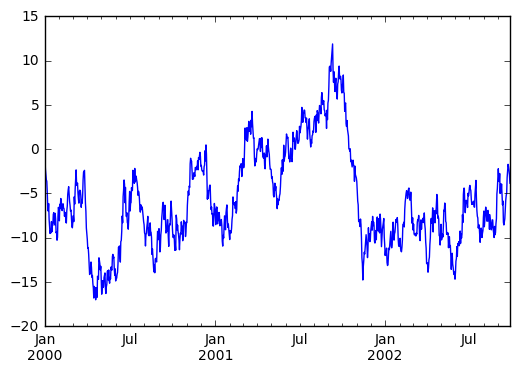

In [130]:
# plot a series almost automatically
ts.plot()

On DataFrame, plot() is a convenience to plot all of the columns with labels:

In [131]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])

In [132]:
df = df.cumsum()

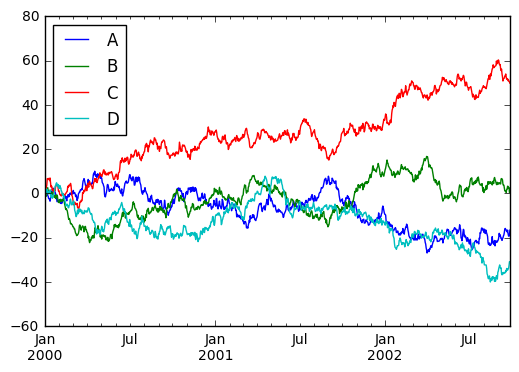

In [133]:
plt.figure(); df.plot(); plt.legend(loc='best')

## Getting Data In/Out

### CSV
[Writing to a csv file](http://pandas.pydata.org/pandas-docs/stable/io.html#io-store-in-csv)

In [134]:
df.to_csv('foo.csv')

[Reading from a csv file](http://pandas.pydata.org/pandas-docs/stable/io.html#io-read-csv-table)

In [135]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.229566,0.947490,0.327015,-1.178972
1,2000-01-02,1.327026,1.381528,1.667987,-0.720750
2,2000-01-03,-0.823735,1.058180,2.168018,0.305420
3,2000-01-04,0.552687,-1.261507,2.648051,0.602534
4,2000-01-05,0.235865,-0.188814,3.794863,1.862987
5,2000-01-06,0.082977,1.223707,6.632730,1.549228
6,2000-01-07,-1.006019,2.593655,6.618860,0.010621
7,2000-01-08,-1.288507,1.148484,6.751376,0.800920
8,2000-01-09,-2.352525,-0.146812,6.532781,0.745332
9,2000-01-10,-2.499233,0.517220,6.722906,0.394381


### HDF5
Reading and writing to [HDFStores](http://pandas.pydata.org/pandas-docs/stable/io.html#io-hdf5)

Writing to a HDF5 Store

In [136]:
df.to_hdf('foo.h5','df')

Reading from a HDF5 Store

In [137]:
pd.read_hdf('foo.h5','df')

,A,B,C,D
2000-01-01,0.229566,0.947490,0.327015,-1.178972
2000-01-02,1.327026,1.381528,1.667987,-0.720750
2000-01-03,-0.823735,1.058180,2.168018,0.305420
2000-01-04,0.552687,-1.261507,2.648051,0.602534
2000-01-05,0.235865,-0.188814,3.794863,1.862987
2000-01-06,0.082977,1.223707,6.632730,1.549228
2000-01-07,-1.006019,2.593655,6.618860,0.010621
2000-01-08,-1.288507,1.148484,6.751376,0.800920
2000-01-09,-2.352525,-0.146812,6.532781,0.745332
2000-01-10,-2.499233,0.517220,6.722906,0.394381


### Excel

Reading and writing to [MS Excel](http://pandas.pydata.org/pandas-docs/stable/io.html#io-excel)

Writing to an excel file

In [138]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

Reading from an excel file

In [139]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,A,B,C,D
2000-01-01,0.229566,0.947490,0.327015,-1.178972
2000-01-02,1.327026,1.381528,1.667987,-0.720750
2000-01-03,-0.823735,1.058180,2.168018,0.305420
2000-01-04,0.552687,-1.261507,2.648051,0.602534
2000-01-05,0.235865,-0.188814,3.794863,1.862987
2000-01-06,0.082977,1.223707,6.632730,1.549228
2000-01-07,-1.006019,2.593655,6.618860,0.010621
2000-01-08,-1.288507,1.148484,6.751376,0.800920
2000-01-09,-2.352525,-0.146812,6.532781,0.745332
2000-01-10,-2.499233,0.517220,6.722906,0.394381


### Gotchas
If you are trying an operation and you see an exception like:

In [140]:
if pd.Series([False, True, False]):
    print("I was true")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

See [Comparisons](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-compare) for an explanation and what to do.

See [Gotchas](http://pandas.pydata.org/pandas-docs/stable/gotchas.html#gotchas) as well.